<div class="alert alert-block alert-info " style=' color:MidnightBlue; background-color: AliceBlue ;  border-radius: 30px; border-color: black; '>
<hr><h1 > TP Arbre de décicion - MIS 5A -  <img  src="   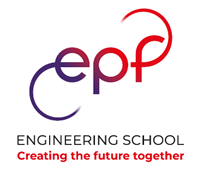" align="right"  width="100" > 
 <br>
     <br>
     <br>
 <hr>
</div>
<div class="alert alert-block alert-info" style='color:midnightblue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '> 
 <br>
    <ol>Le but de ce TP est d’implémenter les arbres de décision pour résoudre des problèmes de classification et de régression.<br>
    </ol>
     <br>
    </div>

*Entrez votre Nom, Prénom et Majeure ici*

<div class="alert alert-block alert-info" style='color:midnightblue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '> 
    <hr><h2>1.	Partie classification </h2><hr>    
    <ol>
Pour la partie classification, on vous demande d’utiliser la base de données breast_cancer. Cette base de données comprend pour chaque patiente 30 données d’entrées càd 30 observations issues de l’examen d’imagerie médicale de cette patiente. Le but de la classification est de diagnostiquer une tumeur maligne ou bénigne, les données de sortie sont donc classifiées en deux classes : maligne ou bénigne. 
Le but de cette partie est de construire un modèle pour faire cette classification du cancer du sein.
 <br>
    </ol>
</div>

<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
1.1	L'ensemble de données est disponible dans la bibliothèque scikit-learn. Commencez par importer la fonction load_breast_cancer du module sklearn.datasets, puis chargez la base de données via cette instruction load_breast_cancer().
    </div>

In [1]:
from sklearn.datasets import load_breast_cancer
bd = load_breast_cancer()


<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    1.2	Soit X les observations et Y les sorties correspondantes. Sachant qu’on accède aux observations via l’attribut data et aux sorties via l’attribut target appliqués tous les deux à la base de données (nom_bd.data et nom_bd.target), afficher la taille des données X et Y.
    </div>

In [2]:
X = bd.data
Y = bd.target
print(X.shape)


(569, 30)



<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    1.3	Utilisez l’instruction feature_names appliquée au nom de votre base de données (nom_bd. feature_names) pour afficher le nom des différentes observations.
    </div>

In [3]:
print(bd.feature_names)


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']



<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    1.4	Faire de même pour afficher les noms des sorties (des étiquettes) en utilisant l’instruction target_names.
    </div>

In [4]:
print(bd.target_names)


['malignant' 'benign']



<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    1.5	Utilisez l’instruction train_test_split pour diviser la base de données X et Y en base d’apprentissage X_train et Y_train et en base de test X_test et Y_test avec un ratio de taille
de test =0.3 et le paramètre shuffle à False et random_state=42.
    </div>

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,shuffle=False,random_state=42)
print(X.shape)
print(X_train.shape)
print(X_test.shape)


(569, 30)
(398, 30)
(171, 30)


<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    1.6	Faites en sorte que les exemples soient aléatoirement répartis dans la base d’apprentissage en utilisant np.random.permutation.
    </div>

In [6]:
import numpy as np
shuffle_index = np.random.permutation(len(X_train)) 
X_train,Y_train = X_train[shuffle_index],Y_train[shuffle_index]



<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    1.7	Construisez un arbre de décision que vous appellerez tree1 et entrainez-le sur les données de la base d’entrainement en prenant comme seul paramètre criterion="entropy".  
    </div>

In [7]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(criterion="entropy")
tree1.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')


<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    1.8	Visualisez l’arbre obtenu en utilisant graphviz et en produisant un fichier .dot que vous afficherez. Expliquez comment se fait la prédiction à partir de cet arbre.
    </div>

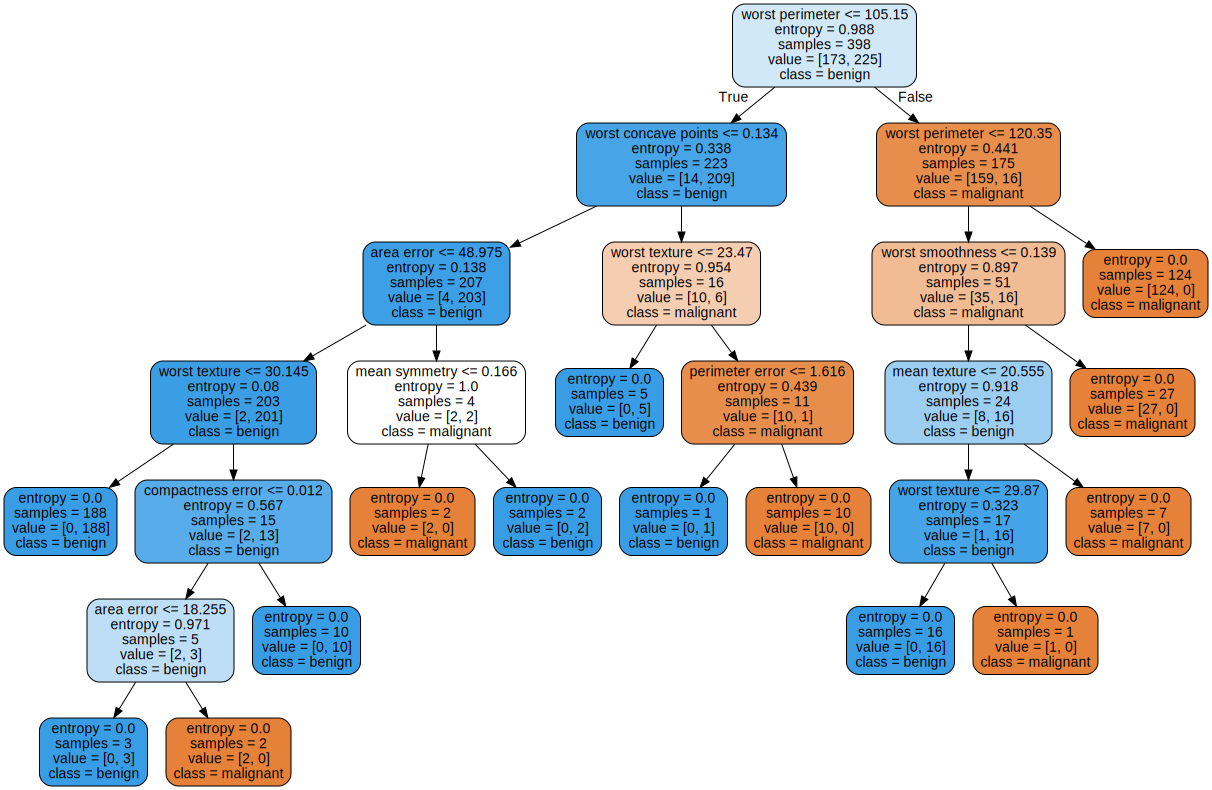

In [8]:
from sklearn.tree import export_graphviz
import os
from graphviz import Source
with open("cancer.dot", 'w') as f:
    export_graphviz(tree1, out_file=os.path.join( "cancer.dot"),
        feature_names=bd.feature_names[:], class_names=bd.target_names,
        rounded=True, filled=True)
Source.from_file(os.path.join("cancer.dot"))


<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    1.9	Réalisez la prédiction sur les données de test.
    </div>

In [9]:
y_predt=tree1.predict(X_test)
print(y_predt)

[1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1
 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1
 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0]



<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    1.10	Affichez la matrice de confusion obtenue sur les données de test (sans utiliser la validation croisée). Expliquer le résultat obtenu.
    </div>

In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix ( Y_test ,  y_predt))

[[ 38   1]
 [ 13 119]]


<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    1.11	Afficher les métriques de classification suivantes : précision, rappel et F1. Expliquer à quoi correspond chaque métrique et les résultats obtenus.
    </div>

In [17]:
from sklearn.metrics import precision_score,recall_score,f1_score
print("precision = ",precision_score(Y_test ,  y_predt))
print("rappel = ",recall_score(Y_test ,  y_predt))
print("f1 = ",f1_score(Y_test ,  y_predt))


precision =  0.9916666666666667
rappel =  0.9015151515151515
f1 =  0.9444444444444444



<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    1.12	Construisez un autre arbre de décision que vous appellerez tree2 et entrainez-le sur les données de la base d’entrainement en prenant comme paramètres : criterion="entropy" et une hauteur maximum d’arbre =3.  
    </div>

In [22]:
tree2 = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
tree2.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)


<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    1.13	Afficher l’arbre obtenu. Commentez le résultat obtenu.
    </div>

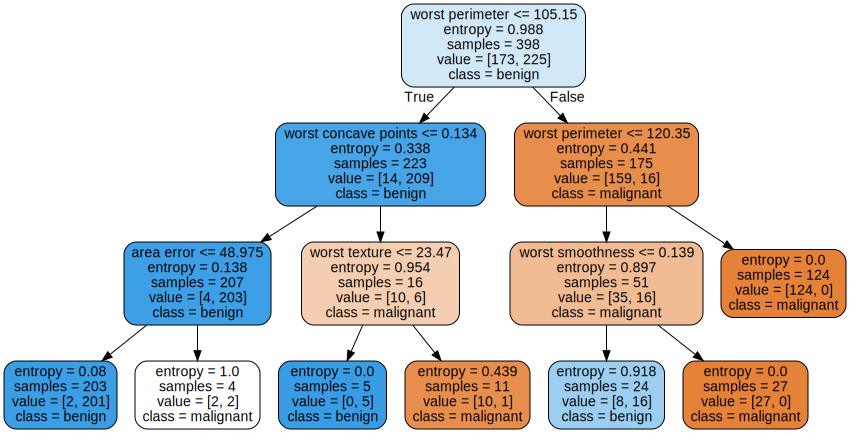

In [23]:
with open("cancer.dot", 'w') as f:
    export_graphviz(tree2, out_file=os.path.join( "cancer.dot"),
        feature_names=bd.feature_names[:], class_names=bd.target_names,
        rounded=True, filled=True)
Source.from_file(os.path.join("cancer.dot"))


<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    1.14	Expliquer les différents paramètres affichés pour un nœud et expliquer le calcul de chaque paramètre.
    </div>

In [ ]:
#Insérez votre code ici


<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    1.15	Réalisez la prédiction sur les données de test.
    </div>

In [26]:
y_predt2=tree2.predict(X_test)

<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    1.16	Affichez la matrice de confusion obtenue sur les données de test (sans utiliser la validation croisée). Expliquer le résultat obtenu.
    </div>

In [27]:
print(confusion_matrix ( Y_test ,  y_predt2))

[[ 37   2]
 [  6 126]]



<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
1.17	Afficher les métriques de classification suivantes : précision, rappel et F1. 
    </div>

In [28]:
print("precision = ",precision_score(Y_test ,  y_predt2))
print("rappel = ",recall_score(Y_test ,  y_predt2))
print("f1 = ",f1_score(Y_test ,  y_predt2))


precision =  0.984375
rappel =  0.9545454545454546
f1 =  0.9692307692307692



<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    1.18	Construisez un autre arbre de décision que vous appellerez tree3 et entrainez-le sur les données de la base d’entrainement en prenant comme paramètres : criterion="entropy" et min_samples_leaf = 20.  A quoi correspond ce dernier paramètre ?
    </div>

In [29]:
tree3 = DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 20)
tree3.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20)


<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    1.19	Réalisez la prédiction sur les données de test.
    </div>

In [30]:
y_predt3=tree3.predict(X_test)


<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    1.20	Affichez la matrice de confusion obtenue sur les données de test (sans utiliser la validation croisée). Expliquer le résultat obtenu.
    </div>

In [31]:
print(confusion_matrix ( Y_test ,  y_predt3))

[[ 37   2]
 [ 11 121]]


<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
1.21	Afficher les métriques de classification suivantes : précision, rappel et F1. 
    </div>

In [32]:
print("precision = ",precision_score(Y_test ,  y_predt3))
print("rappel = ",recall_score(Y_test ,  y_predt3))
print("f1 = ",f1_score(Y_test ,  y_predt3))

precision =  0.983739837398374
rappel =  0.9166666666666666
f1 =  0.9490196078431372


<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
1.22	Comparer les résultats de tree1, tree2 et tree3. Conclure
    </div>


In [41]:
#Insérez votre code ici

<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
    <hr><h2>Partie 2</h2><hr>    
    
Nous allons à présent utiliser la base de données diabetes de scikit learn. Cette base de données va nous permettre de prédire la progression du diabète (qui est la variable à prédire) un an après à partir de 10 caractéristiques des personnes (l'âge, le sexe, l'indice de masse corporelle, la pression artérielle moyenne et six mesures de sérum sanguin). Ces caractéristiques représentent les différentes observations.
 <br>       
2.1	Chargez la base de données Diabetes du module sklearn.datasets via l’instruction load_diabetes.


</div>

In [10]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()


<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
2.2	Faire une partition aléatoire en partie apprentissage et partie test (70% apprentissage, 30% test) en utilisant l’instruction model_selection.train_test_split.


</div>

In [12]:

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.30,shuffle=False,random_state=42)

print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
2.3	Construire un modèle d’arbre de régression de profondeur 3 pour cette base.
    </div>

In [13]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=3, random_state=42)


<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
2.4	Entrainer le modèle construit sur la base d’apprentissage.
    </div>


In [14]:
clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

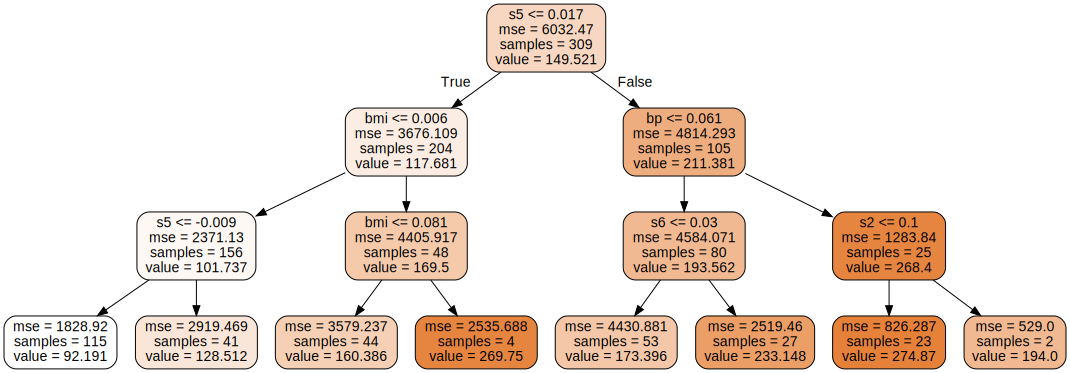

In [15]:
from sklearn.tree import export_graphviz
import os
from graphviz import Source
with open("diabetes.dot", 'w') as f:
    export_graphviz(clf, out_file=os.path.join( "diabetes.dot"),
        feature_names=diabetes.feature_names[:],
        rounded=True, filled=True)
Source.from_file(os.path.join("diabetes.dot"))

<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
2.5	Faites la prédiction sur la base de test pour produire y_predicted
        </div>



In [39]:
y_predicted = clf.predict(X_test)
print(X_test[10] )
print(y_predicted[10] )
print(y_test[10] )


[ 0.01991321 -0.04464164  0.00457217  0.04597245 -0.01808039 -0.05454912
  0.06336665 -0.03949338  0.02866072  0.06105391]
233.14814814814815
191.0


<div class="alert alert-block alert-info" style='color:MidnightBlue; background-color: AliceBlue ; border-radius: 30px; border-color: black; '>
2.6	Affichez l’erreur quadratique moyenne entre y_predicted et y_test.
     </div>

In [34]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_predicted))

3751.8364570061703
